# Problem Statement



*   In this project, we will build a simple machine learning model to convert from celsius to fahrenheit.
*   The equation is as follows: T('F) = T('C) * 9/5 + 32







# Step 0 Import Libraries

In [ ]:
!pip install tensorflow

In [17]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1 Import Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
temp_df = pd.read_csv('/content/drive/MyDrive/Celsius+to+Fahrenheit.csv')

In [18]:
temp_df.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [ ]:
temp_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [ ]:
temp_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


# Step 2 Visualize Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


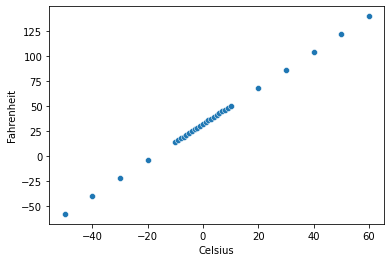

In [19]:
sns.scatterplot(temp_df['Celsius'], temp_df['Fahrenheit'])    #X, Y  axis

# Step 3 Create Testing and Training Dataset

In [20]:
X_train = temp_df['Celsius']  #input
y_train = temp_df['Fahrenheit']   #output

# Step 4 Build and Train the Model

In [21]:
X_train.shape

(30,)

In [22]:
y_train.shape

(30,)

In [66]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))   #units is the number of neurons

In [59]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 3)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss= 'mean_squared_error')  #0.05 is learning rate

In [68]:
epochs_hist = model.fit(X_train, y_train, epochs = 700)   #training the model

Epoch 1/700
1/1 [==============================] - 0s 243ms/step - loss: 1200.0070
Epoch 2/700
1/1 [==============================] - 0s 4ms/step - loss: 1137.4993
Epoch 3/700
1/1 [==============================] - 0s 4ms/step - loss: 1085.5657
Epoch 4/700
1/1 [==============================] - 0s 6ms/step - loss: 1044.2156
Epoch 5/700
1/1 [==============================] - 0s 4ms/step - loss: 1013.1813
Epoch 6/700
1/1 [==============================] - 0s 7ms/step - loss: 991.7988
Epoch 7/700
1/1 [==============================] - 0s 4ms/step - loss: 978.8963
Epoch 8/700
1/1 [==============================] - 0s 3ms/step - loss: 972.7415
Epoch 9/700
1/1 [==============================] - 0s 7ms/step - loss: 971.1313
Epoch 10/700
1/1 [==============================] - 0s 3ms/step - loss: 971.6712
Epoch 11/700
1/1 [==============================] - 0s 4ms/step - loss: 972.1829
Epoch 12/700
1/1 [==============================] - 0s 5ms/step - loss: 971.0707
Epoch 13/700
1/1 [============

# Step 5 Evaluate the Model

In [69]:
epochs_hist.history.keys()

dict_keys(['loss'])

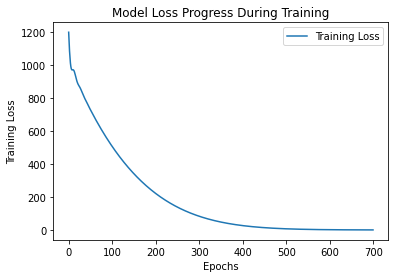

In [70]:
plt.plot(epochs_hist.history['loss'])                #plotting the loss
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])                        #title, xlabel, ylabel, and legend are optional. we can still visualize the loss only using plt.plot

In [71]:
#seeing the weights and biases

model.get_weights()                   #these weights and biases make sense because going back to the equation to find F (T('F) = T('C) * 9/5 + 32) the weights are very close to 9/5 and the biases are very close to 32

[array([[1.8020846]], dtype=float32), array([31.474556], dtype=float32)]

In [78]:
Temp_C = 5                   #test variable

Temp_F = model.predict([Temp_C])    #inputing our test variable into the model
print('Temperature in DefF Using the Model is: ', Temp_F)

Temperature in DefF Using the Model is:  [[40.484978]]


In [81]:
z = Temp_C * 9/5 + 32
print('Temperature in DefF Using hard code is: ', z)

Temperature in DefF Using hard code is:  41.0
